Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
Mentor: doc. dr. sc. Krešimir Križanović

### Klasifikacija_bolesti_na_temelju_podataka_o_ekspresiji_gena
## SEMINAR 1 2024./2025.  
Domagoj Sviličić

http://www.fer.unizg.hr

Učitavanje potrebnih biblioteka

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
# %pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 1. Klasifikacija karcinoma dojke na temelju podataka o ekspresiji gena

#### Struktura dataseta za klasifikaciju karcinoma dojke
<p align="center"> Tablica 1. "Breast_GSE45827.csv"  </p>
<p align="center">
    <img src="./breast_carc.png" alt="Struktura tablice za klasifikaciju raka dojke">
</p>


Izlučivanje potrebnih stupaca...

In [6]:

from sklearn.preprocessing import LabelEncoder

# Učitavanje podataka iz CSV datoteke
file_path = 'Breast_GSE45827.csv'  # zamijeniti s točnom putanjom do datoteke
data = pd.read_csv(file_path)

# Brojanje ukupnog broja stupaca u podacima
total_columns = data.shape[1]
print(f"Ukupan broj stupaca: {total_columns}")

# Izdvajanje oznaka klase i značajki
y = data.iloc[:, 1]  # drugi stupac s oznakama klase stupac type
print("-----------------------------")
print(f"Struktura podataka oznaka (y):\n{y}")
print("-----------------------------")
X = data.iloc[:, 2:]  # svi stupci nakon drugog s razinama ekspresije gena

# Kodiranje oznaka klasa
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("-----------------------------")
print(f"Struktura podataka oznaka (y_encoded) nakon enkodiranja oznaka:\n{y_encoded}")
print("-----------------------------")

# Provjera dimenzija
print(f"Dimenzije značajki (X): {X.shape}")
print(f"Dimenzije oznaka (y_encoded): {y_encoded.shape}")

Ukupan broj stupaca: 54677
-----------------------------
Struktura podataka oznaka (y):
0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object
-----------------------------
-----------------------------
Struktura podataka oznaka (y_encoded) nakon enkodiranja oznaka:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4]
-----------------------------
Dimenzije značajki (X): (151, 54675)
Dimenzije oznaka (y_encoded): (151,)


### 1.1 Višeklasna (6 klasa) klasifikacija raka dojke logističkom regresijom
Klase su sljedeće: **basal**, **HER**, **luminal_A**, **luminal_B**, **cell_line** i **normal**. Prvih pet oznaka predstavljaju različite vrste raka dojke, dok oznaka **normal** označava da osoba ne boluje od nijedne vrste raka dojke.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Funkcija za treniranje modela i evaluaciju točnosti za dani omjer podjele
def evaluate_model(X, y_encoded, test_size, random_state=1):
    # Podjela podataka
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=0)  # postavljanje random_state za replikaciju rezultata
    # Treniranje modela logističke regresije
    model = LogisticRegression(max_iter=100, solver='lbfgs')  # automatski odabir metode za višeklasnu/multinomijalnu klasifikaciju / defaultno l2 regularizacija i multiclass=multinomial
    model.fit(X_train, y_train)
    # Predikcija i točnost na testnom skupu
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Predikcija i točnost na skupu za učenje
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    return test_accuracy, train_accuracy

# Evaluacija za različite omjere
accuracy_7_3_test, accuracy_7_3_train = evaluate_model(X, y_encoded, test_size=0.3)
accuracy_6_4_test, accuracy_6_4_train = evaluate_model(X, y_encoded, test_size=0.4)
accuracy_1_1_test, accuracy_1_1_train = evaluate_model(X, y_encoded, test_size=0.5)

# Ispis rezultata
print("Točnost za različite omjere podjele podataka za višeklasnu (6 klasa) klasifikacija raka dojke logističkom regresijom:")
print(f"Omjer 7:3: Točnost na testnom skupu = {accuracy_7_3_test:.4f}, Točnost na skupu za učenje = {accuracy_7_3_train:.4f}")
print(f"Omjer 6:4: Točnost na testnom skupu = {accuracy_6_4_test:.4f}, Točnost na skupu za učenje = {accuracy_6_4_train:.4f}")
print(f"Omjer 1:1: Točnost na testnom skupu = {accuracy_1_1_test:.4f}, Točnost na skupu za učenje = {accuracy_1_1_train:.4f}")


Točnost za različite omjere podjele podataka za višeklasnu (6 klasa) klasifikacija raka dojke logističkom regresijom:
Omjer 7:3: Točnost na testnom skupu = 0.8913, Točnost na skupu za učenje = 1.0000
Omjer 6:4: Točnost na testnom skupu = 0.9344, Točnost na skupu za učenje = 1.0000
Omjer 1:1: Točnost na testnom skupu = 0.9342, Točnost na skupu za učenje = 1.0000


### 1.2 Višeklasna (6 klasa) klasifikacija karcinoma dojke pomoću SVM modela s linearnom jezgrenom metodom

In [37]:
from sklearn.svm import SVC


# Funkcija za treniranje modela i evaluaciju točnosti za dani omjer podjele
def evaluate_svm_model(X, y_encoded, test_size, random_state=0):
    # Podjela podataka
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)  # postavljanje random_state za replikaciju rezultata
    # Treniranje SVM modela s linearnom jezgrom
    model = SVC(kernel='linear')  # SVM s linearnom jezgrom
    model.fit(X_train, y_train)
    # Predikcija i točnost na testnom skupu
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Predikcija i točnost na skupu za učenje
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    return test_accuracy, train_accuracy

# Evaluacija za različite omjere
accuracy_7_3_test, accuracy_7_3_train = evaluate_svm_model(X, y_encoded, test_size=0.3)
accuracy_6_4_test, accuracy_6_4_train = evaluate_svm_model(X, y_encoded, test_size=0.4)
accuracy_1_1_test, accuracy_1_1_train = evaluate_svm_model(X, y_encoded, test_size=0.5)

# Ispis rezultata
print("Točnost za različite omjere podjele podataka za višeklasnu (6 klasa) klasifikacija raka dojke SVM s linearnom jezgrom:")
print(f"Omjer 7:3: Točnost na testnom skupu = {accuracy_7_3_test:.4f}, Točnost na skupu za učenje = {accuracy_7_3_train:.4f}")
print(f"Omjer 6:4: Točnost na testnom skupu = {accuracy_6_4_test:.4f}, Točnost na skupu za učenje = {accuracy_6_4_train:.4f}")
print(f"Omjer 1:1: Točnost na testnom skupu = {accuracy_1_1_test:.4f}, Točnost na skupu za učenje = {accuracy_1_1_train:.4f}")


Točnost za različite omjere podjele podataka za višeklasnu (6 klasa) klasifikacija raka dojke SVM s linearnom jezgrom:
Omjer 7:3: Točnost na testnom skupu = 0.9130, Točnost na skupu za učenje = 1.0000
Omjer 6:4: Točnost na testnom skupu = 0.9344, Točnost na skupu za učenje = 1.0000
Omjer 1:1: Točnost na testnom skupu = 0.9474, Točnost na skupu za učenje = 1.0000


### 1.3 Višeklasna (6 klasa) klasifikacija karcinoma dojke pomoću modela dubokog učenja i PCA metode

PCA (Principal Component Analysis) je tehnika smanjenja dimenzionalnosti koja se koristi za identificiranje glavnih komponenti u skupu podataka. Ove glavne komponente su novi, ortogonalni pravci (dimenzije) koji maksimalno zadržavaju varijansu originalnih podataka. Postupak započinje standardizacijom podataka, zatim se izračunava kovarijacijska matrica kako bi se utvrdila povezanost između značajki. Sljedeći korak je računanje vlastitih vrijednosti i vektora kovarijacijske matrice, koji određuju glavne komponente. Konačno, podaci se transformiraju u novi koordinatni sustav definiran tim glavnim komponentama, čime se smanjuje broj dimenzija uz minimalni gubitak informacija.

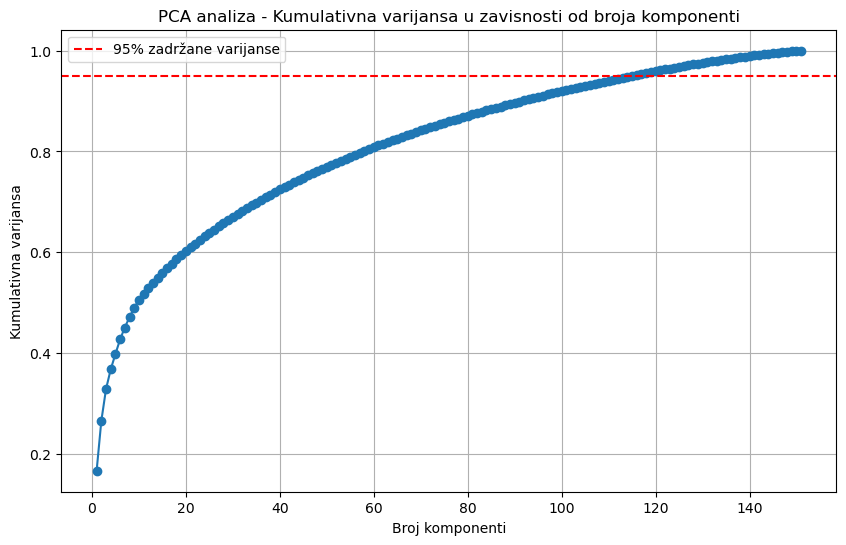

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Primena PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Izračunavanje kumulativne varijanse
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Prikazivanje grafa kumulativne varijanse
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Kumulativna varijansa')
plt.title('PCA analiza - Kumulativna varijansa u zavisnosti od broja komponenti')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% zadržane varijanse')
plt.legend()
plt.grid(True)
plt.show()


PCA reducira broj komponenti na otprilike 117 komponenti pri kojima je zadržano 95% varijance. Te komponente prosljeđujemo našoj neuronskoj mreži i nad njima treniramo mrežu.

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2)

# Definiranje modela
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Prvi skriveni sloj
model.add(Dense(32, activation='relu'))  # Drugi skriveni sloj
model.add(Dense(6, activation='softmax'))  # Izlazni sloj sa 6 klasa

# Kompiliranje modela
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treniranje modela
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluacija modela na testnom skupu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Točnost modela sa PCA komponentama: {accuracy:.4f}')

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 9.3782 - accuracy: 0.3500
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 5.5328 - accuracy: 0.4917
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 3.1194 - accuracy: 0.5750
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 1.9497 - accuracy: 0.6833
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.8000
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.8583
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.9167
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9583
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9833
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9917
Epoch 11/50
4/4 [======================

### 1.4 Primjena biblioteke "Lazy Predict" 

Lazy Predict je Python biblioteka koja olakšava izgradnju i evaluaciju različitih modela strojnog učenja bez potrebe za ručnim podešavanjem parametara. Ova biblioteka omogućuje brzo testiranje više modela i prikazivanje njihove performanse kroz detaljne izvještaje.

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Primjena Lazy Predict na skupu podataka
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


 97%|█████████▋| 30/31 [01:32<00:07,  7.34s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.228127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1455901
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 54675
[LightGBM] [Info] Start training from score -1.752539
[LightGBM] [Info] Start training from score -1.181994
[LightGBM] [Info] Start training from score -2.371578
[LightGBM] [Info] Start training from score -1.678431
[LightGBM] [Info] Start training from score -1.544899
[LightGBM] [Info] Start training from score -3.624341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

100%|██████████| 31/31 [02:00<00:00,  3.87s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.96               0.97    None      0.96   
LinearDiscriminantAnalysis         0.92               0.94    None      0.92   
BernoulliNB                        0.92               0.93    None      0.92   
SGDClassifier                      0.92               0.93    None      0.92   
RidgeClassifierCV                  0.95               0.93    None      0.95   
RidgeClassifier                    0.95               0.93    None      0.95   
ExtraTreesClassifier               0.93               0.93    None      0.93   
Perceptron                         0.89               0.91    None      0.90   
LinearSVC                          0.88               0.90    None      0.89   
PassiveAggressiveClassifier        0.88               0.90    None      0.89   
NearestCentroid                    0.88 

Analiza rezltata:

   * Najbolje Performanse: LogisticRegression postiže najbolje rezultate sa točnošću od 0.96 i vremenskim trajanjem treniranja od 1.75 sekundi.

   * Brzi Modeli: BernoulliNB i RidgeClassifier su među najbržima sa treniranjem ispod 1 sekunde, a imaju solidne performanse.

   * Varijabilnost u Performansama: KNeighborsClassifier i SVC pokazuju niže performanse u usporedbi s drugim modelima, ali njihova točnost je još uvijek respektabilna.

   * Najsloženiji Modeli: XGBClassifier i LGBMClassifier imaju znatno duže vrijeme treniranja, ali njihove performanse nisu najbolje, što sugerira da dodatna kompleksnost nije nužno korisna za vaš skup podataka.

   * Izuzetno Niske Performanse: Modeli poput QuadraticDiscriminantAnalysis i LabelSpreading pokazuju znatno niže performanse i možda nisu prikladni za ovaj zadatak.

In [6]:

logistic_model = clf.models['LogisticRegression']
print(logistic_model)

# Prikazivanje parametara modela u svrhu usporedbe sa ručno treniranim modelom
print(logistic_model.get_params())


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_a...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encodi

Razlika između rezultata LazyPredict i ručne implementacije logističke regresije često proizlazi iz dodatnih automatskih koraka koje LazyPredict poduzima, kao što su imputacija nedostajućih vrijednosti, skaliranje numeričkih podataka i enkodiranje kategorijskih podataka. Također, LazyPredict možda koristi unaprijed definirane postavke ili dodatne optimizacije koje nisu eksplicitno navedene u ručnoj implementaciji. Ove razlike u obradi podataka i podešavanju hiperparametara mogu značajno utjecati na performanse modela, objašnjavajući bolji rezultat LazyPredict biblioteke.



### 1.5 Primjena XGBoost modela


XGBoost, poznat i kao eXtreme Gradient Boosting, je napredna implementacija algoritma gradient boosting. Funkcionira tako što koristi postupak zvan boosting, gdje se nekoliko slabih modela, najčešće jednostavnih stabala odlučivanja, trenira sekvencijalno. Svaki model nastoji ispraviti greške prethodnog modela.

Algoritam koristi gradient descent optimizaciju za minimiziranje funkcije gubitka. To znači da se modeli prilagođavaju na osnovi gradijentnih grešaka, odnosno pokušavaju minimizirati razliku između stvarnih vrijednosti i predikcija.

XGBoost uključuje i regularizaciju kako bi se spriječilo preprilagođavanje, odnosno overfitting. Regularizacija pomaže u održavanju balansa između modela koji je prekompleksan i onog koji je prejednostavan.

Također je poznat po svojoj brzini i učinkovitosti, koristeći unutarnje paralelizme, optimizirano računarstvo i sposobnost rukovanja s velikim količinama podataka.

Točnost modela: 0.88
Optimalan broj boosting rundi: 17


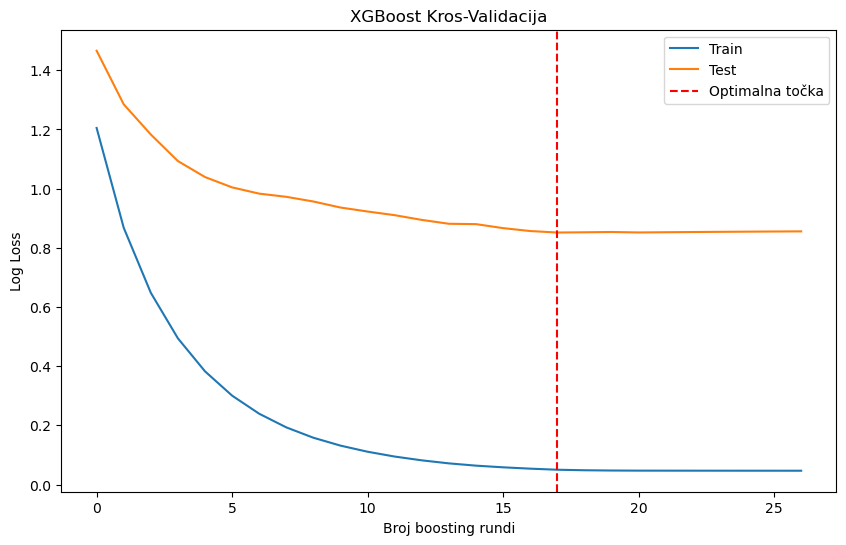

In [7]:
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=0)

# Kreiranje DMatrix-a za XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Postavljanje parametara za XGBoost
params = {
    'objective': 'multi:softmax',  # ili 'multi:softprob' za vjerojatnosti
    'num_class': len(set(y_encoded)),
    'max_depth': 6,
    'eta': 0.3,
    'seed': 0
}

# Kros-validacija za pronalazak optimalne točke
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=5, num_boost_round=27, metrics="mlogloss", as_pandas=True, seed=0)
optimal_num_boost_rounds = cv_results['test-mlogloss-mean'].argmin()

# Treniranje modela
bst = xgb.train(params, dtrain, num_boost_round=optimal_num_boost_rounds)

# Predikcija na testnom skupu
y_pred = bst.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)

print(f'Točnost modela: {accuracy:.2f}')
print(f'Optimalan broj boosting rundi: {optimal_num_boost_rounds}')

# Crtanje grafa kros-validacije
plt.figure(figsize=(10, 6))
plt.plot(cv_results['train-mlogloss-mean'], label='Train')
plt.plot(cv_results['test-mlogloss-mean'], label='Test')
plt.axvline(x=optimal_num_boost_rounds, color='r', linestyle='--', label='Optimalna točka')
plt.xlabel('Broj boosting rundi')
plt.ylabel('Log Loss')
plt.title('XGBoost Kros-Validacija')
plt.legend()
plt.show()


Graf kros validacije pokazuje trenutak pojavljivanja konvergencije na testnom skupu. Zbog sofisticarnog mehanizma primjene kros validacije u funkciji cv() ne uočavamo karakteristični skok na testnom skupu već njegovo svojstvo konvergencije. Model XGBoost-a je toliko dobro regulariziran da uopće nije povećao pogrešku na testnom skupu Opcionalno postoji parametar early_stopping_rounds u xgb.cv() funkciji koji pazi da se model ne vrti bez veze u zoni konvergencije. Npr. early_stopping_rounds=7 znači da će trening biti zaustavljen ako performanse modela (mjereno prema metrikama kao što je gubitak) ne pokažu poboljšanje nakon 7 uzastopnih rundi.

### 1.6 Random forest

 Random forest je ansambl metoda koja koristi više odluka stabala za klasifikaciju ili regresiju. Svako stablo u šumi trenira se na različitim podskupovima podataka s nasumičnim uzorkovanjem, a konačna odluka se donosi većinskim glasanjem ili prosjekom rezultata svih stabala. Ova metoda poboljšava preciznost i smanjuje preprilagođavanje (overfitting) usporedbom s pojedinačnim stablom. Random forest je robusna i fleksibilna tehnika koja može raditi s različitim vrstama podataka i lako se nositi s velikim skupovima podataka.

Točnost modela: 0.91
Optimalan broj stabala: 66


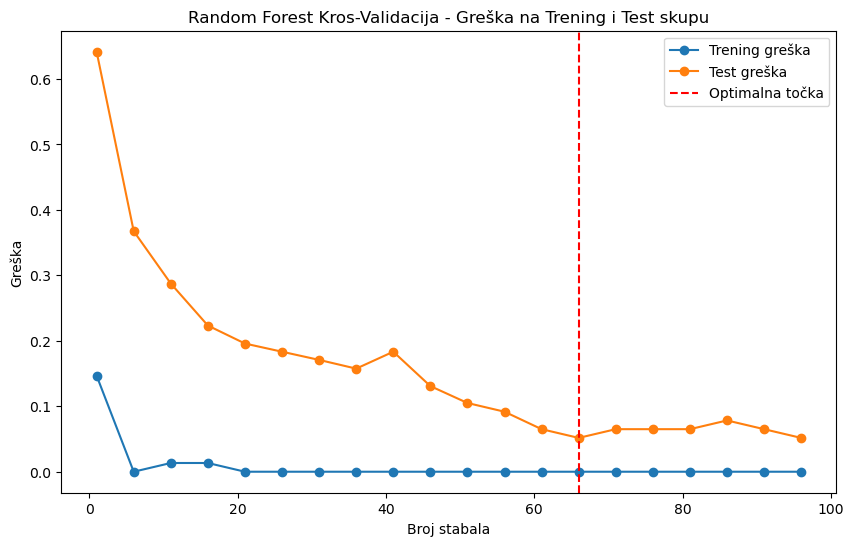

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=0)

# Parametri za Random Forest
num_trees = range(1, 101, 5)  # Ispitivanje broja stabala od 1 do 100 u koracima od 5
train_errors = []
test_errors = []

# Kros-validacija za različite brojeve stabala
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train, y_train)
    
    # Greška na trening skupu
    y_train_pred = rf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Kros-validacija na testnom skupu
    test_error = 1 - cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy').mean()
    test_errors.append(test_error)

# Pronalaženje optimalnog broja stabala (minimum greške na testnom skupu)
optimal_trees = num_trees[np.argmin(test_errors)]

# Treniranje konačnog modela sa optimalnim brojem stabala
rf_final = RandomForestClassifier(n_estimators=optimal_trees, random_state=0)
rf_final.fit(X_train, y_train)

# Predikcija na testnom skupu
y_pred = rf_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Točnost modela: {accuracy:.2f}')
print(f'Optimalan broj stabala: {optimal_trees}')

# Crtanje grafa kros-validacije
plt.figure(figsize=(10, 6))
plt.plot(num_trees, train_errors, marker='o', label='Trening greška')
plt.plot(num_trees, test_errors, marker='o', label='Test greška')
plt.axvline(x=optimal_trees, color='r', linestyle='--', label='Optimalna točka')
plt.xlabel('Broj stabala')
plt.ylabel('Greška')
plt.title('Random Forest Kros-Validacija - Greška na Trening i Test skupu')
plt.legend()
plt.show()


Cross-validation graf prikazuje greške modela na trening i test skupovima za različite brojeve stabala. Ovo pomaže procijeniti kako se model ponaša s različitim brojem stabala.

### 1.7 DecisionTree

Decision Tree je model strojnog učenja koji koristi strukturu stabla za donošenje odluka. Svaki unutarnji čvor predstavlja pitanje ili uvjet vezan za značajku podataka, dok svaki list (završni čvor) predstavlja ishod ili odluku. Kroz niz binarnih podjela, model iterativno dijeli podatke na manje podskupove dok se ne postigne najbolje moguće razdvajanje. Svaka podjela maksimizira informativnost. Na kraju, put od korijenskog čvora do lista pruža predikciju za novi uzorak. Stabla odluke su laka za interpretirati i vizualizirati, ali su sklona preprilagođavanju ako nisu pravilno ograničena. Poboljšanje koncepta stabala odluke predstavljaju random forests koja su i našem slučaju ostvarila bolju točnost.

Točnost modela: 0.71
Optimalna dubina stabla: 3


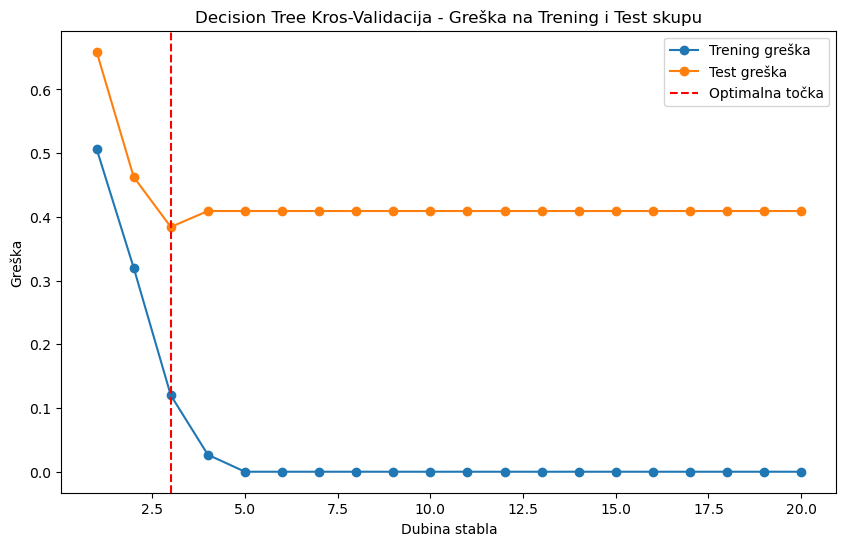

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Podjela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=0)

# Parametri za Decision Tree
max_depths = range(1, 21)  # Ispitivanje dubine stabla od 1 do 20
train_errors = []
test_errors = []

# Kros-validacija za različite dubine stabla
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)
    
    # Greška na trening skupu
    y_train_pred = dt.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Kros-validacija na testnom skupu
    test_error = 1 - cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy').mean()
    test_errors.append(test_error)

# Pronalaženje optimalne dubine stabla (minimum greške na testnom skupu)
optimal_depth = max_depths[np.argmin(test_errors)]

# Treniranje konačnog modela sa optimalnom dubinom stabla
dt_final = DecisionTreeClassifier(max_depth=optimal_depth, random_state=0)
dt_final.fit(X_train, y_train)

# Predikcija na testnom skupu
y_pred = dt_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Točnost modela: {accuracy:.2f}')
print(f'Optimalna dubina stabla: {optimal_depth}')

# Crtanje grafa kros-validacije
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, marker='o', label='Trening greška')
plt.plot(max_depths, test_errors, marker='o', label='Test greška')
plt.axvline(x=optimal_depth, color='r', linestyle='--', label='Optimalna točka')
plt.xlabel('Dubina stabla')
plt.ylabel('Greška')
plt.title('Decision Tree Kros-Validacija - Greška na Trening i Test skupu')
plt.legend()
plt.show()


# 2. Klasifikacija leukemije na temelju podataka o ekspresiji gena

#### Struktura datasetova za klasifikaciju leukemije:
<p align="center">Tablica 2. "data_set_ALL_AML_train.csv" (7129 redaka/78 stupaca)</p>
<p align="center">
    <img src="./data_set_ALL_AML_train.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>
<p align="center"> Struktura tablice "data_set_ALL_AML_train" za klasifikaciju leukemije sadrži podatke za 38 pacijenata i predstavlja skup za učenje. Prisutnost gena označena je sljedećim znakovima: A označava
da gen nije prisutan (engl. Absent), P označava da je gen prisutan (engl. Present) i M
označava da ne možemo sa sigurnošću tvrditi da li je gen prisutan ili ne (engl. Marginal). Naš skup podataka sadrži dvije vrste oznaka: <b>ALL</b> koja predstavlja akutnu limfoblastičnu leukemiju
i <b>AML</b> koja predstavlja akutnu mijeloičnu leukemiju. To su ujedno i klase kojima
pridružujemo primjere.</p>


<p align="center">Tablica 3. "data_set_ALL_AML_independent.csv" (7129 redaka/70 stupaca) </p>
<p align="center">
    <img src="./data_set_ALL_AML_independent.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>
<p align="center"> Struktura tablice "data_set_ALL_AML_independent" za klasifikaciju leukemije sadrži podatke za 34 pacijenata i predstavlja skup za testiranje. Struktura je potpuno analogna prethodnoj tablici.</p>

<p align="center">Tablica 4. "actual.csv" (72 redka/2 stupca)</p>
<p align="center">
    <img src="./actual.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>
<p align="center"> Struktura tablice "actual.csv" za klasifikaciju leukemije sadrži tip karcinoma koji ima svaki od 72 pacijenta koji promatramo (38 u skupu za učenje i 34 u skupu za testiranje). Naš skup podataka sadrži dvije vrste oznaka: <b>ALL</b> koja predstavlja akutnu limfoblastičnu leukemiju
i <b>AML</b> koja predstavlja akutnu mijeloičnu leukemiju. To su ujedno i klase kojima
pridružujemo primjere.</p>

---------------------------------------------------------
Potrebno je malo manipulacije podacima: iz "data_set_ALL_AML_train.csv" datoteke vadim stupce s oznakama prisutnosti gena (A,P ili M) i formiram novu tablicu (38 redaka/7129 stupaca) tako da svaki izvučeni stupac postane redak u toj tablici. Trebamo dobiti sljedeću tablicu:
<p align="center">Tablica 5. "train1.csv" (38 redaka/7129 stupaca) </p>
<p align="center">
    <img src="./train1.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>

In [6]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
# %pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
import pandas as pd

# Funkcija za enkodiranje oznaka
def encode_labels(label):
    if label == 'A':
        return -1
    elif label == 'P':
        return 1
    elif label == 'M':
        return 0
    else:
        return label

file_path = 'leukemia_data/data_set_ALL_AML_train.csv'  # zamijeniti s točnom putanjom do datoteke
data = pd.read_csv(file_path)

# Brojanje ukupnog broja stupaca u podacima
total_columns = data.shape[1]
print(f"Ukupan broj stupaca u originalnoj csv datoteci: {total_columns}")

# Ispisivanje prvog naslovnog redka CSV datoteke
print("Naslovni redak CSV datoteke:")
print(data.columns.values)

# Brojanje ukupnog broja redaka u podacima
total_r = data.shape[0]
print(f"Ukupan broj redaka u originalnoj csv datoteci: {total_r}")

# Preimenovanje stupca "call" u "call.0"
data.columns = ['call.0' if col == 'call' else col for col in data.columns]

# Generiranje i sortiranje stupaca prema zadanim uputama
sorted_columns = ['Gene Description', 'Gene Accession Number']
sorted_data = data[sorted_columns]  # Stvaranje nove tablice s osnovnim stupcima

for i in range(1, 39):
    num_str = str(i)
    if num_str in data.columns:
        num_index = data.columns.get_loc(num_str)  # Dohvaćanje indeksa stupca num_str
        call_col = data.columns[num_index + 1]     # Dohvaćanje stupca odmah desno
        sorted_data = pd.concat([sorted_data, data[[num_str, call_col]]], axis=1)

# Ispisivanje naslovnog redka nove tablice sorted
print("\nNaslovni redak nove tablice sorted:")
print(sorted_data.columns.values)

# Izdvajanje stupaca 4., 6., 8. itd.
columns_to_extract = sorted_data.columns[3::2]
extracted_columns = sorted_data[columns_to_extract]

# Pretvaranje stupaca u redove nove tablice bez sortiranja
train1_x = extracted_columns.transpose()

print("\n")
print("Izgled nove tablice:")
# Ispis nove tablice
print(train1_x)

train1_x = train1_x.applymap(encode_labels)
print("izgled tablice train1_x nakon enkodiranja oznaka:")
print(train1_x)






Ukupan broj stupaca u originalnoj csv datoteci: 78
Naslovni redak CSV datoteke:
['Gene Description' 'Gene Accession Number' '1' 'call' '2' 'call.1' '3'
 'call.2' '4' 'call.3' '5' 'call.4' '6' 'call.5' '7' 'call.6' '8' 'call.7'
 '9' 'call.8' '10' 'call.9' '11' 'call.10' '12' 'call.11' '13' 'call.12'
 '14' 'call.13' '15' 'call.14' '16' 'call.15' '17' 'call.16' '18'
 'call.17' '19' 'call.18' '20' 'call.19' '21' 'call.20' '22' 'call.21'
 '23' 'call.22' '24' 'call.23' '25' 'call.24' '26' 'call.25' '27'
 'call.26' '34' 'call.27' '35' 'call.28' '36' 'call.29' '37' 'call.30'
 '38' 'call.31' '28' 'call.32' '29' 'call.33' '30' 'call.34' '31'
 'call.35' '32' 'call.36' '33' 'call.37']
Ukupan broj redaka u originalnoj csv datoteci: 7129

Naslovni redak nove tablice sorted:
['Gene Description' 'Gene Accession Number' '1' 'call.0' '2' 'call.1' '3'
 'call.2' '4' 'call.3' '5' 'call.4' '6' 'call.5' '7' 'call.6' '8' 'call.7'
 '9' 'call.8' '10' 'call.9' '11' 'call.10' '12' 'call.11' '13' 'call.12'
 '14' '

Postupak ponovimo ali izvlačimo numeričke stupce sa informacijama o razini ekspresije gena. Dobivamo tablicu:
<p align="center">Tablica 6. "train2.csv" (38 redaka/7129 stupaca) </p>
<p align="center">
    <img src="./train2.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>

In [8]:
# Izdvajanje stupaca 4., 6., 8. itd.
columns_to_extract = sorted_data.columns[2::2]
extracted_columns = sorted_data[columns_to_extract]

# Pretvaranje stupaca u redove nove tablice bez sortiranja
train2_x = extracted_columns.transpose()

print("\n")
print("Izgled nove tablice:")
# Ispis nove tablice
print(train2_x)




Izgled nove tablice:
    0     1     2     3     4     5     6     7     8     9     ...  7119  \
1   -214  -153   -58    88  -295  -558   199  -176   252   206  ...   185   
2   -139   -73    -1   283  -264  -400  -330  -168   101    74  ...   169   
3    -76   -49  -307   309  -376  -650    33  -367   206  -215  ...   315   
4   -135  -114   265    12  -419  -585   158  -253    49    31  ...   240   
5   -106  -125   -76   168  -230  -284     4  -122    70   252  ...   156   
6   -138   -85   215    71  -272  -558    67  -186    87   193  ...   115   
7    -72  -144   238    55  -399  -551   131  -179   126   -20  ...    30   
8   -413  -260     7    -2  -541  -790  -275  -463    70  -169  ...   289   
9      5  -127   106   268  -210  -535     0  -174    24   506  ...   356   
10   -88  -105    42   219  -178  -246   328  -148   177   183  ...    42   
11  -165  -155   -71    82  -163  -430   100  -109    56   350  ...   185   
12   -67   -93    84    25  -179  -323  -135  -127   

Ponovimo to i sa skupom za testiranje i dobivamo skupove test1_x i test2_x. Također očekivane izlaze zapisane u "actual.csv" podijelimo sukladno podijeli na skup za učenje i treniranje: Prvih 38 ide kao oznake za train1_x i train2_x ulaze. preostalih 34 ide za oznake test1_x (A,P,M - kategorički podaci) i test2.x (numerički podaci) skupovima.

In [9]:

import pandas as pd

# Učitavanje podataka iz CSV datoteke
file_path = 'leukemia_data/data_set_ALL_AML_independent.csv'  
data = pd.read_csv(file_path)

# Brojanje ukupnog broja stupaca u podacima
total_columns = data.shape[1]
print(f"Ukupan broj stupaca u originalnoj csv datoteci: {total_columns}")

# Brojanje ukupnog broja redaka u podacima
total_r = data.shape[0]
print(f"Ukupan broj redaka u originalnoj csv datoteci: {total_r}")

# Ispisivanje prvog naslovnog redka CSV datoteke
print("Naslovni redak originalne CSV datoteke:")
print(data.columns.values)

# Preimenovanje stupca "call" u "call.0"
data.columns = ['call.0' if col == 'call' else col for col in data.columns]

# Generiranje i sortiranje stupaca prema zadanim uputama
sorted_columns = ['Gene Description', 'Gene Accession Number']
sorted_data = data[sorted_columns]  # Stvaranje nove tablice s osnovnim stupcima

for i in range(39, 73):
    num_str = str(i)
    if num_str in data.columns:
        num_index = data.columns.get_loc(num_str)  # Dohvaćanje indeksa stupca num_str
        call_col = data.columns[num_index + 1]     # Dohvaćanje stupca odmah desno
        sorted_data = pd.concat([sorted_data, data[[num_str, call_col]]], axis=1)

# Ispisivanje naslovnog redka nove tablice sorted
print("\nNaslovni redak nove tablice sorted:")
print(sorted_data.columns.values)

# Izdvajanje stupaca 4., 6., 8. itd.
columns_to_extract = sorted_data.columns[3::2]
extracted_columns = sorted_data[columns_to_extract]

# Pretvaranje stupaca u redove nove tablice bez sortiranja
test1_x = extracted_columns.transpose()

print("\nIzgled nove tablice test1_x:")
print(test1_x)

# Enkodiranje oznaka
test1_x = test1_x.applymap(encode_labels)

print("\nIzgled nove tablice s oznakama prisutnosti gena nakon enkodiranja:")
print(test1_x)

# Izdvajanje stupaca 3., 5., 7. itd.
columns_to_extract = sorted_data.columns[2::2]
extracted_columns = sorted_data[columns_to_extract]

# Pretvaranje stupaca u redove nove tablice bez sortiranja
test2_x = extracted_columns.transpose()

print("\nIzgled nove tablice test2_x:")
print(test2_x)

# Učitavanje datoteke actual.csv
actual_file_path = 'leukemia_data/actual.csv'  
actual_data = pd.read_csv(actual_file_path)

# Izdvajanje prvih 38 redaka nakon prvog redka sa nazivima stupaca za train_y
train_y = actual_data.iloc[0:38, 1]

print("\nIzgled train_y (prvih 38 redaka):")
print(train_y)
print(f"Duljina train_y: {len(train_y)}")

# Izdvajanje preostalih 34 redka nakon prvih 38 za test_y i drugi stupac
test_y = actual_data.iloc[38:73, 1]

print("\nIzgled test_y (preostalih 34 redka):")
print(test_y)
print(f"Duljina test_y: {len(test_y)}")


Ukupan broj stupaca u originalnoj csv datoteci: 70
Ukupan broj redaka u originalnoj csv datoteci: 7129
Naslovni redak originalne CSV datoteke:
['Gene Description' 'Gene Accession Number' '39' 'call' '40' 'call.1' '42'
 'call.2' '47' 'call.3' '48' 'call.4' '49' 'call.5' '41' 'call.6' '43'
 'call.7' '44' 'call.8' '45' 'call.9' '46' 'call.10' '70' 'call.11' '71'
 'call.12' '72' 'call.13' '68' 'call.14' '69' 'call.15' '67' 'call.16'
 '55' 'call.17' '56' 'call.18' '59' 'call.19' '52' 'call.20' '53'
 'call.21' '51' 'call.22' '50' 'call.23' '54' 'call.24' '57' 'call.25'
 '58' 'call.26' '60' 'call.27' '61' 'call.28' '65' 'call.29' '66'
 'call.30' '63' 'call.31' '64' 'call.32' '62' 'call.33']

Naslovni redak nove tablice sorted:
['Gene Description' 'Gene Accession Number' '39' 'call.0' '40' 'call.1'
 '41' 'call.6' '42' 'call.2' '43' 'call.7' '44' 'call.8' '45' 'call.9'
 '46' 'call.10' '47' 'call.3' '48' 'call.4' '49' 'call.5' '50' 'call.23'
 '51' 'call.22' '52' 'call.20' '53' 'call.21' '54' 'ca

### 2.1 klasifikacija leukemije logističkom regresijom
Naš skup podataka sadrži dvije vrste oznaka: **ALL** koja predstavlja akutnu limfoblastičnu leukemiju
i **AML** koja predstavlja akutnu mijeloičnu leukemiju. To su ujedno i klase kojima
pridružujemo primjere.

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Inicijalizacija LabelEncoder-a
label_encoder = LabelEncoder()

# Pretvorba oznaka u numeričke vrijednosti : u principu nije eksplicitno potrebno to raditi jer će modeli sami raditi enkodiranje
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

# Pretvorba u pandas Series
train_y_encoded = pd.Series(train_y_encoded)
test_y_encoded = pd.Series(test_y_encoded)

# Enkodiranje oznaka
#train1_x = train1_x.applymap(encode_labels)

# Treniranje modela logističke regresije na train1_x i train_y_encoded
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(train1_x, train_y)

# Predikcija i točnost na test1_x i test_y
predictions = model.predict(test1_x)
test_accuracy = accuracy_score(test_y, predictions)
print(f"Točnost na skupu za testiranje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi test1_x i test_y): {test_accuracy:.4f}")

predictions2 = model.predict(train1_x)
test_accuracy2 = accuracy_score(train_y, predictions2)
print(f"Točnost na skupu za učenje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi train1_x i train_y): {test_accuracy2:.4f}")

# Treniranje modela logističke regresije na train2_x i train_y_encoded
model.fit(train2_x, train_y_encoded)

# Predikcija i točnost na test2_x i test_y_encoded
predictions3 = model.predict(test2_x)
test_accuracy = accuracy_score(test_y_encoded, predictions3)
print(f"Točnost na skupu za testiranje za numeričke značajke razine ekspresije (test2_x i test_y): {test_accuracy:.4f}")

train_accuracy = accuracy_score(train_y_encoded, model.predict(train2_x))
print(f"Točnost na skupu za učenje za numeričke značajke razine ekspresije (train2_x i train_y): {train_accuracy:.4f}")

# Kombinirani podaci za train1_x i test1_x
combined_x = pd.concat([train1_x, test1_x])
combined_y = pd.concat([train_y_encoded, test_y_encoded])

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train, X_test, y_train, y_test = train_test_split(combined_x, combined_y, test_size=0.3, random_state=42)

# Treniranje modela logističke regresije na novom skupu za učenje
model.fit(X_train, y_train)

# Predikcija i točnost na novom skupu za testiranje
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na novom skupu za testiranje : {test_accuracy:.4f}")

predictions4 = model.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions4)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na skupu za učenje : {test_accuracy:.4f}")

# Kombinirani podaci za train2_x i test2_x
combined_x = pd.concat([train2_x, test2_x])
combined_y = pd.concat([train_y_encoded, test_y_encoded])

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train, X_test, y_train, y_test = train_test_split(combined_x, combined_y, test_size=0.3, random_state=42)

# Treniranje modela logističke regresije na novom skupu za učenje
model.fit(X_train, y_train)

# Predikcija i točnost na novom skupu za testiranje
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na novom skupu za testiranje : {test_accuracy:.4f}")

predictions4 = model.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions4)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na skupu za učenje : {test_accuracy:.4f}")


# print(train_y)
# print(test_y) 

# print(f"Tip strukture train_x: {type(train1_x)}")
# print(f"Tip strukture train_y_encoded: {type(train_y_encoded)}")
# print(f"Tip strukture test_x: {type(test1_x)}")
# print(f"Tip strukture test_y_encoded: {type(test_y_encoded)}") 



Točnost na skupu za testiranje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi test1_x i test_y): 0.9118
Točnost na skupu za učenje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi train1_x i train_y): 1.0000
Točnost na skupu za testiranje za numeričke značajke razine ekspresije (test2_x i test_y): 0.9706
Točnost na skupu za učenje za numeričke značajke razine ekspresije (train2_x i train_y): 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na novom skupu za testiranje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na skupu za učenje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na novom skupu za testiranje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na skupu za učenje : 1.0000


Usporedba s referentnom implementacijom:
<p align="center">Tablica 7. "rezultati logističke regresije" </p>
<p align="center">
    <img src="./refer.png" alt="Struktura tablice za klasifikaciju leukemije">
</p>

### 2.2 klasifikacija leukemije pomoću SVM-a s linearnim jezgrenim funkcijama

In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Pretvorite numpy array u pandas DataFrame ako već nisu
train1_x = pd.DataFrame(train1_x)
test1_x = pd.DataFrame(test1_x)
train2_x = pd.DataFrame(train2_x)
test2_x = pd.DataFrame(test2_x)

# Treniranje SVM modela s linearnom jezgrom na train1_x i train_y_encoded
model = SVC(kernel='linear', max_iter=1000)
model.fit(train1_x, train_y)

# Predikcija i točnost na test1_x i test_y_encode
predictions = model.predict(test1_x)
test_accuracy = accuracy_score(test_y, predictions)
print(f"Točnost na skupu za testiranje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi test1_x i test_y): {test_accuracy:.4f}")

predictions2 = model.predict(train1_x)
test_accuracy2 = accuracy_score(train_y, predictions2)
print(f"Točnost na skupu za učenje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi train1_x i train_y): {test_accuracy2:.4f}")

#------------------------------------------------------------
# Treniranje SVM modela s linearnom jezgrom na train2_x i train_y_encoded
model = SVC(kernel='linear', max_iter=1000)
model.fit(train2_x, train_y_encoded) #slobodno i train_y jer su to kategoricki podaci pa ih ne treba enkodeirati

# Predikcija i točnost na test2_x i test_y_encoded
predictions3 = model.predict(test2_x)
test_accuracy = accuracy_score(test_y_encoded, predictions3)
print(f"Točnost na skupu za testiranje za numeričke značajke razine ekspresije (test2_x i test_y): {test_accuracy:.4f}")

train_accuracy = accuracy_score(train_y_encoded, model.predict(train2_x))
print(f"Točnost na skupu za učenje za numeričke značajke razine ekspresije(train2_x i train_y): {train_accuracy:.4f}")

#------------------------------------------------------------

# Kombinirani podaci za train1_x i test1_x, te train_y_encoded i test_y_encoded
combined_x = pd.concat([train1_x, test1_x], ignore_index=True)
combined_y = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train, X_test, y_train, y_test = train_test_split(combined_x, combined_y, test_size=0.3, random_state=42)

# Treniranje SVM modela s linearnom jezgrom na novom skupu za učenje
model = SVC(kernel='linear', max_iter=10000)
model.fit(X_train, y_train)

# Predikcija i točnost na novom skupu za testiranje
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na novom skupu za testiranje : {test_accuracy:.4f}")

predictions4 = model.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions4)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na skupu za učenje : {test_accuracy:.4f}")

#------------------------------------------------------------

# Kombinirani podaci za train2_x i test2_x, te train_y_encoded i test_y_encoded
combined_x = pd.concat([train2_x, test2_x], ignore_index=True)
combined_y = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train, X_test, y_train, y_test = train_test_split(combined_x, combined_y, test_size=0.3, random_state=42)

# Treniranje SVM modela s linearnom jezgrom na novom skupu za učenje
model.fit(X_train, y_train)

# Predikcija i točnost na novom skupu za testiranje
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na novom skupu za testiranje : {test_accuracy:.4f}")

predictions4 = model.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions4)
print(f"Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na skupu za učenje : {test_accuracy:.4f}")


Točnost na skupu za testiranje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi test1_x i test_y): 0.9118
Točnost na skupu za učenje za značajke koje pokazuju prisutnost gena (A,P,M)(skupovi train1_x i train_y): 1.0000
Točnost na skupu za testiranje za numeričke značajke razine ekspresije (test2_x i test_y): 0.9706
Točnost na skupu za učenje za numeričke značajke razine ekspresije(train2_x i train_y): 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na novom skupu za testiranje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) sa značajkama prisutnosti gena -> Točnost na skupu za učenje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na novom skupu za testiranje : 1.0000
Slučajno odabrani skupovi za učenje i testiranje (omjer 7:3) za numeričke značajke razine ekspresije gena -> Točnost na skupu za učenje : 1.0000


### 2.3 klasifikacija leukemije pomoću biblioteke Lazy predict

In [16]:
import pandas as pd

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Prvi skup: Kombinirani podaci za train1_x i test1_x, te train_y_encoded i test_y_encoded
combined_x1 = pd.concat([train1_x, test1_x], ignore_index=True)
combined_y1 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(combined_x1, combined_y1, test_size=0.3, random_state=42)

# Drugi skup: Kombinirani podaci za train2_x i test2_x, te train_y_encoded i test_y_encoded
combined_x2 = pd.concat([train2_x, test2_x], ignore_index=True)
combined_y2 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train2, X_test2, y_train2, y_test2 = train_test_split(combined_x2, combined_y2, test_size=0.3, random_state=42)

# Kreiranje LazyClassifier objekta
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Evaluacija modela na prvom skupu
models1, predictions1 = clf.fit(X_train1, X_test1, y_train1, y_test1)
print(f"Rezultati za značajke prisutnosti gena:\n{models1}")

# Evaluacija modela na drugom skupu
models2, predictions2 = clf.fit(X_train2, X_test2, y_train2, y_test2)
print(f"\nRezultati za numeričke značajke razine ekspresije gena:\n{models2}")


100%|██████████| 29/29 [00:03<00:00,  8.10it/s]


[LightGBM] [Info] Number of positive: 16, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 778
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320000 -> initscore=-0.753772
[LightGBM] [Info] Start training from score -0.753772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:04<00:00,  6.10it/s]

[LightGBM] [Info] Number of positive: 16, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 128457
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 7129
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320000 -> initscore=-0.753772
[LightGBM] [Info] Start training from score -0.753772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Uvidom u rezultate za podatke o **značajkama prisutnosti gena** uočavam kako su LinearSVC, SGDClassifier, Perceptron i PassiveAggressiveClassifier modeli koji imaju točnost, uravnoteženu točnost, ROC AUC i F1 Score od 1.00. To znači da su ti modeli ispravno klasificirali sve instance u skupu podataka.

Analogno uvidom u rezultate za **numeričke podatke o razini ekspresije gena** uočavam kako su AdaBoostClassifier, GaussianNB, SGDClassifier, Perceptron i LGBMClassifier imali najbolje moguće rezultate

Analiza stupca ROC AUC...
##### ROC (Receiver Operating Characteristic) Curve  
ROC krivulja prikazuje odnos između True Positive Rate (TPR) i False Positive Rate (FPR) za različite pragove klasifikacije.

- **True Positive Rate (TPR)**: Također poznat kao osjetljivost ili recall, izračunava se kao:
  \[
  TPR = \frac{TP}{TP + FN}
  \]
  Gdje je:
  - **TP**: True Positives (točne pozitivne predikcije)
  - **FN**: False Negatives (pogrešne negativne predikcije)

- **False Positive Rate (FPR)**: Izračunava se kao:
  \[
  FPR = \frac{FP}{FP + TN}
  \]
  Gdje je:
  - **FP**: False Positives (pogrešne pozitivne predikcije)
  - **TN**: True Negatives (točne negativne predikcije)



##### AUC (Area Under Curve)  
AUC je površina ispod ROC krivulje, a vrijednosti se kreću između 0 i 1.

- **AUC = 1**: Savršen model. Model točno klasificira sve primjere.
- **AUC = 0.5**: Nasumičan model. Model ne razlikuje pozitivne od negativnih primjera bolje od slučajnosti.
- **AUC < 0.5**: Loš model. Model ima lošije performanse od nasumičnog modela.



##### Zašto je ROC AUC važan?

- **Robustnost na neuravnotežene podatke**: ROC AUC je korisna kada su klase neuravnotežene jer se temelji na osjetljivosti i specifičnosti, a ne samo na točnosti.
  
- **Prag klasifikacije**: ROC krivulja omogućuje analizu performansi modela za različite pragove klasifikacije, što omogućava odabir optimalnog praga prema specifičnim potrebama.

Ovaj grafički prikaz pomaže u vizualizaciji sposobnosti modela da razlikuje između pozitivnih i negativnih klasa kroz različite pragove, čime se pruža uvid u ukupnu učinkovitost modela.

---


### 2.4 Klasifikacija leukemije pomoću XGBoost

In [17]:

from xgboost import XGBClassifier

# Prvi skup: Kombinirani podaci za train1_x i test1_x, te train_y_encoded i test_y_encoded
combined_x1 = pd.concat([train1_x, test1_x], ignore_index=True)
combined_y1 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(combined_x1, combined_y1, test_size=0.3, random_state=42)

# Drugi skup: Kombinirani podaci za train2_x i test2_x, te train_y_encoded i test_y_encoded
combined_x2 = pd.concat([train2_x, test2_x], ignore_index=True)
combined_y2 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train2, X_test2, y_train2, y_test2 = train_test_split(combined_x2, combined_y2, test_size=0.3, random_state=42)

# Treniranje XGBoost modela na prvom skupu
xgb_model1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model1.fit(X_train1, y_train1)
predictions1 = xgb_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, predictions1)
print(f"Točnost na prvom skupu (prisutnost gena): {accuracy1:.4f}")

# Treniranje XGBoost modela na drugom skupu
xgb_model2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model2.fit(X_train2, y_train2)
predictions2 = xgb_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, predictions2)
print(f"Točnost na drugom skupu (razina ekspresije gena): {accuracy2:.4f}")


Točnost na prvom skupu (prisutnost gena): 0.9091
Točnost na drugom skupu (razina ekspresije gena): 0.9545


### 2.5 Klasifikacija leukemije pomoću Random forest

In [18]:

from sklearn.ensemble import RandomForestClassifier

# Prvi skup: Kombinirani podaci za train1_x i test1_x, te train_y_encoded i test_y_encoded
combined_x1 = pd.concat([train1_x, test1_x], ignore_index=True)
combined_y1 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(combined_x1, combined_y1, test_size=0.3, random_state=42)

# Drugi skup: Kombinirani podaci za train2_x i test2_x, te train_y_encoded i test_y_encoded
combined_x2 = pd.concat([train2_x, test2_x], ignore_index=True)
combined_y2 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train2, X_test2, y_train2, y_test2 = train_test_split(combined_x2, combined_y2, test_size=0.3, random_state=42)

# Treniranje Random Forest modela na prvom skupu
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train1, y_train1)
predictions1 = rf_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, predictions1)
print(f"Točnost na prvom skupu (prisutnost gena): {accuracy1:.4f}")

# Treniranje Random Forest modela na drugom skupu
rf_model2 = RandomForestClassifier(random_state=42)
rf_model2.fit(X_train2, y_train2)
predictions2 = rf_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, predictions2)
print(f"Točnost na drugom skupu (razina ekspresije gena): {accuracy2:.4f}")


Točnost na prvom skupu (prisutnost gena): 0.9545
Točnost na drugom skupu (razina ekspresije gena): 0.9545


### 2.6 Klasifikacija leukemije pomoću DecisionTree

In [20]:
from sklearn.tree import DecisionTreeClassifier


# Prvi skup: Kombinirani podaci za train1_x i test1_x, te train_y_encoded i test_y_encoded
combined_x1 = pd.concat([train1_x, test1_x], ignore_index=True)
combined_y1 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train1, X_test1, y_train1, y_test1 = train_test_split(combined_x1, combined_y1, test_size=0.3, random_state=42)

# Drugi skup: Kombinirani podaci za train2_x i test2_x, te train_y_encoded i test_y_encoded
combined_x2 = pd.concat([train2_x, test2_x], ignore_index=True)
combined_y2 = pd.concat([train_y_encoded, test_y_encoded], ignore_index=True)

# Podjela na skupove za učenje i testiranje u omjeru 7:3
X_train2, X_test2, y_train2, y_test2 = train_test_split(combined_x2, combined_y2, test_size=0.3, random_state=42)

# Treniranje Decision Tree modela na prvom skupu
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_train1, y_train1)
predictions1 = dt_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, predictions1)
print(f"Točnost na prvom skupu (prisutnost gena): {accuracy1:.4f}")

# Treniranje Decision Tree modela na drugom skupu
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(X_train2, y_train2)
predictions2 = dt_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, predictions2)
print(f"Točnost na drugom skupu (razina ekspresije gena): {accuracy2:.4f}")


Točnost na prvom skupu (prisutnost gena): 0.7727
Točnost na drugom skupu (razina ekspresije gena): 0.9545
